In [278]:
import pandas as pd

In [279]:
df = pd.read_csv(r'C:\Users\anshu\Desktop\Anshul Data Science\Flight_Data\baseline_df.csv')

In [280]:
df.shape

(119769, 20)

In [281]:
df.Report_Run_Time.unique()

array(['2024-03-10', '2024-03-11', '2024-03-12', '2024-03-13',
       '2024-03-14', '2024-03-15', '2024-03-16', '2024-03-17',
       '2024-03-18', '2024-03-19', '2024-03-21', '2024-03-22',
       '2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26',
       '2024-03-27', '2024-03-28', '2024-03-29', '2024-03-30',
       '2024-04-01', '2024-04-02', '2024-04-03'], dtype=object)

In [283]:
df['from_hour'] = pd.to_datetime(df['from_timestamp_1']).dt.hour

In [284]:
df[['from_timestamp_1','from_hour']]

,from_timestamp_1,from_hour
0,2024-03-28 06:47:00,6
1,2024-03-28 07:30:00,7
2,2024-03-28 05:15:00,5
3,2024-03-28 12:00:00,12
4,2024-03-28 16:29:00,16
...,...,...
119764,2024-04-15 16:35:00,16
119765,2024-04-15 21:40:00,21
119766,2024-04-15 22:40:00,22
119767,2024-04-15 22:46:00,22


In [285]:
df.columns

Index(['Unnamed: 0', 'index', 'Report_Run_Time', 'carrier', 'Trip_Type',
       'Airport_Route', 'price', 'overhead_bin', 'layover_count',
       'round_trip_duration', 'Carbon emissions estimate num',
       'carbon_emission% num', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay', 'from_hour'],
      dtype='object')

In [286]:
df = df[[ 'carrier', 'Trip_Type','Airport_Route',
          'layover_count','round_trip_duration',
   'Days_to_Fly', 'from_hour',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay', 'price']]

In [287]:
df.shape

(119769, 11)

In [288]:
df = df[df['flight_duration_value']<=16.5]

In [289]:
df.shape

(117672, 11)

In [290]:
columns_to_encode = ['carrier', 'Trip_Type', 'Airport_Route','Holiday']

In [291]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [292]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), columns_to_encode)
    ], 
    remainder='passthrough'
)

In [293]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [294]:
X = df.iloc[:,:-1]

In [295]:
Y = df.iloc[:,-1:]

In [296]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=40)
scores = cross_val_score(pipeline, X, Y, cv=kfold, scoring='r2')

c:\Users\anshu\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [297]:
scores

array([0.82930967, 0.78903249, 0.81522367, 0.81798997, 0.82472664])

In [298]:
scores.mean(),scores.std()

(0.8152564883203552, 0.01401675253523865)

In [299]:
# encoded_values = {}
# for column in columns_to_encode:
#   X[column] = encode.fit_transform(X[column])
#   encoded_values[column] = dict(zip(encode.classes_, encode.transform(encode.classes_)))

In [300]:
# for column, values in encoded_values.items():
#     print(pd.DataFrame(values.items()))

In [301]:
from sklearn.model_selection import train_test_split

In [325]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

In [326]:
pipeline.fit(X_train,Y_train)

c:\Users\anshu\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['carrier', 'Trip_Type',
                                                   'Airport_Route',
                                                   'Holiday'])])),
                ('regressor', RandomForestRegressor())])

In [327]:
Y_pred = pipeline.predict(X_test)

In [328]:
from sklearn.metrics import r2_score
rf_r2_score = r2_score(Y_test,Y_pred)
rf_r2_score

0.8252143075970474

In [329]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,Y_pred)

39.8305475154593

In [330]:
Y_test = Y_test.reset_index()

In [331]:
Y_pred = pd.DataFrame(Y_pred, columns=['price_pred'])
Y_pred

,price_pred
0,479.049
1,523.970
2,224.690
3,555.100
4,515.680
...,...
23530,451.060
23531,273.500
23532,271.740
23533,276.150


In [332]:
Y_test = pd.concat([Y_test, Y_pred], axis = 1)
Y_test

,index,price,price_pred
0,94693,617.0,479.049
1,398,557.0,523.970
2,6834,193.0,224.690
3,64462,526.0,555.100
4,110064,514.0,515.680
...,...,...,...
23530,90345,527.0,451.060
23531,59833,199.0,273.500
23532,104238,270.0,271.740
23533,70735,269.0,276.150


In [333]:
Y_test['Diff'] = Y_test['price'] - Y_test['price_pred']
Y_test

,index,price,price_pred,Diff
0,94693,617.0,479.049,137.951
1,398,557.0,523.970,33.030
2,6834,193.0,224.690,-31.690
3,64462,526.0,555.100,-29.100
4,110064,514.0,515.680,-1.680
...,...,...,...,...
23530,90345,527.0,451.060,75.940
23531,59833,199.0,273.500,-74.500
23532,104238,270.0,271.740,-1.740
23533,70735,269.0,276.150,-7.150


In [334]:
Y_test[Y_test['Diff'] > 0].sort_values('Diff')

,index,price,price_pred,Diff
12757,24446,244.0,243.996667,0.003333
3576,92377,234.0,233.994167,0.005833
18075,39363,95.0,94.990000,0.010000
1369,76497,193.0,192.980000,0.020000
7477,97055,144.0,143.975000,0.025000
...,...,...,...,...
1436,2575,3018.0,1892.190000,1125.810000
20394,28301,1854.0,704.380000,1149.620000
15367,90111,2983.0,1803.410000,1179.590000
18936,42690,2953.0,1719.710000,1233.290000


In [335]:
Y_test[Y_test['Diff'] < 0].sort_values('Diff')

,index,price,price_pred,Diff
12271,32479,888.0,3462.90,-2574.90
10569,43565,641.0,2401.69,-1760.69
9268,27248,1053.0,2352.58,-1299.58
23282,10302,640.0,1849.13,-1209.13
20922,79856,726.0,1829.14,-1103.14
...,...,...,...,...
9999,23400,254.0,254.01,-0.01
16841,30035,132.0,132.01,-0.01
15541,63918,537.0,537.01,-0.01
5857,13812,143.0,143.01,-0.01


In [336]:
Y_test[Y_test['Diff'] == 0].sort_values('price')

,index,price,price_pred,Diff
7311,60704,112.0,112.0,0.0
9363,101854,112.0,112.0,0.0
18264,60656,112.0,112.0,0.0
9599,72111,148.0,148.0,0.0
4463,86526,204.0,204.0,0.0
...,...,...,...,...
5022,81358,452.0,452.0,0.0
15993,81389,452.0,452.0,0.0
22712,81387,452.0,452.0,0.0
1454,31528,483.0,483.0,0.0


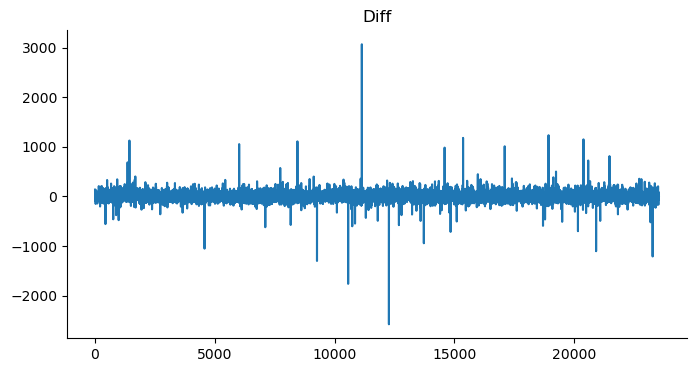

In [337]:
# @title Diff

from matplotlib import pyplot as plt
Y_test['Diff'].plot(kind='line', figsize=(8, 4), title='Diff')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

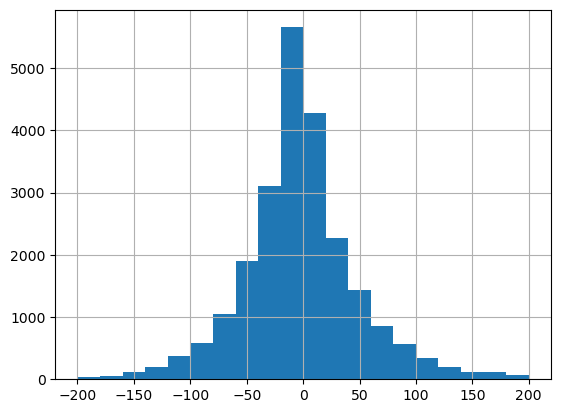

In [354]:
Y_test[(Y_test['Diff']>-200) & (Y_test['Diff']<200)]['Diff'].hist(bins=20)

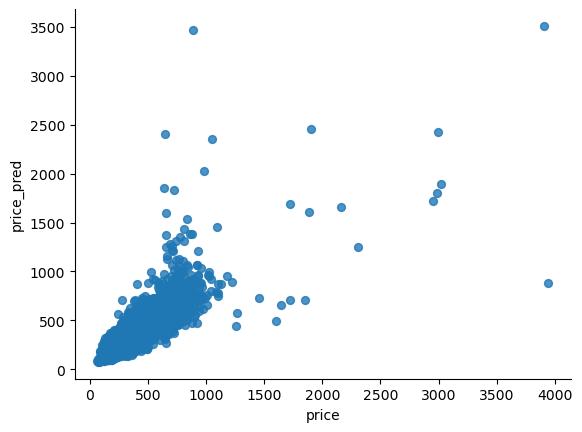

In [340]:
# @title price vs price_pred

from matplotlib import pyplot as plt
Y_test.plot(kind='scatter', x='price', y='price_pred', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [341]:
df.columns

Index(['carrier', 'Trip_Type', 'Airport_Route', 'layover_count',
       'round_trip_duration', 'Days_to_Fly', 'from_hour',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay', 'price'],
      dtype='object')

In [342]:
import pickle

In [343]:
df.head()

,carrier,Trip_Type,Airport_Route,layover_count,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price
0,Spirit,Rounds Trip,EWR - LAX,0.0,89,18,6,6.5,Not_Holiday,4,211.0
1,Alaska,Rounds Trip,EWR - LAX,0.0,89,18,7,6.3,Not_Holiday,4,297.0
2,JetBlue,Rounds Trip,EWR - LAX,0.0,89,18,5,6.2,Not_Holiday,4,298.0
3,United,Rounds Trip,EWR - LAX,0.0,89,18,12,6.4,Not_Holiday,4,302.0
5,Third Party,Rounds Trip,EWR - LAX,1.0,89,18,7,8.1,Not_Holiday,4,270.0


In [344]:
X_test.head(3)

,carrier,Trip_Type,Airport_Route,layover_count,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay
94693,Delta,Rounds Trip,LAX - JFK,0.0,73,36,21,5.3,Not_Holiday,6
398,United,Rounds Trip,EWR - LAX,0.0,10,11,19,6.5,Not_Holiday,4
6834,Spirit,Rounds Trip,LAX - EWR,0.0,83,35,21,5.5,Not_Holiday,1


In [345]:
Y_test.head(3)

,index,price,price_pred,Diff
0,94693,617.0,479.049,137.951
1,398,557.0,523.970,33.030
2,6834,193.0,224.690,-31.690


In [346]:
with open(r'C:\Users\anshu\Desktop\Anshul Data Science\Flight_Data\df.pkl', 'wb') as f:
    # Dump the data into the pickle file
    pickle.dump(df, f)

In [347]:
with open(r'C:\Users\anshu\Desktop\Anshul Data Science\Flight_Data\pipeline.pkl', 'wb') as f:
    # Dump the data into the pickle file
    pickle.dump(pipeline, f)